<a href="https://colab.research.google.com/github/LapTQ/deep_spray/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LapTQ/deep_spray/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Open in Colab](https://colab.research.google.com/github/LapTQ/deep_spray/blob/main/notebook.ipynb)

In [ ]:
# !git clone https://github.com/getchar49/deepspray.git

In [ ]:
!git clone https://github.com/LapTQ/deep_spray.git
%cd deep_spray

In [ ]:
!pip install --upgrade albumentations
!pip install opencv-python~=4.6.0.66
!pip install opencv-contrib-python~=4.6.0.66

In [ ]:
class_name = ['bag', 'lobe', 'Detached ligament', 'drop', 'Attached ligament']
colors = ['red', 'orange', 'deepskyblue', 'mediumseagreen', 'darkgoldenrod']

name_to_id_mapping = {name: id for id, name in enumerate(class_name)}
id_to_name_mapping = {id: name for id, name in enumerate(class_name)}
name_to_color_mapping = {name: color for name, color in zip(class_name, colors)}
id_to_color_mapping = {id: color for id, color in enumerate(colors)}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from pathlib import Path
import cv2
import os
from utils.dataset import *

In [ ]:
### VISUALIZE

for lbl_path in Path('data/labeled/labels').glob('*'):
    lbl_path = str(lbl_path)
    img_path = lbl_path.replace('labels', 'images').replace('txt', 'png')

    boxes = process_txt(lbl_path)
    boxes = np.array([box[1:] + box[:1] for box in boxes])
    img = Image.open(img_path).convert('RGB')
    img = np.array(img)
    boxes = yolo_to_coco(img.shape[:2], boxes)
    boxes = xywh_to_xyxy(boxes)
    print(lbl_path)
    plt.figure(figsize=(40, 20))
    plot_image(img, boxes=boxes, id_to_color_mapping=id_to_color_mapping, id_to_name_mapping=id_to_name_mapping)
    plt.show()          # uncomment this to show images

### END

In [ ]:
# lbl_path = 'deepspray/data/data_1/labels/f_01495.txt'
# img_path = lbl_path.replace('labels', 'images').replace('txt', 'png')
#
# img = np.array(Image.open(img_path).convert('RGB'), dtype=np.uint8)
# # thử paste ra ảnh trắng cùng kích thước
# out_img = np.full_like(img, 255)
#
# boxes = process_txt(lbl_path)
# boxes = [box[1:] for box in boxes]
# boxes = xywh_to_xyxy(yolo_to_coco(img.shape, boxes))
#
# for box in boxes:   # box: [class_id, x, y, w, h]
#     x1, y1, x2, y2 = box
#     out_img[y1:y2, x1:x2] = img[y1:y2, x1:x2]
#
# plt.figure(figsize=(40, 20))
# plt.imshow(out_img)
# plt.show()

In [ ]:
# # augment đơn giản:
# # dùng các box đã đánh nhãn thủ công (vẫn giữ background xung quanh, - xử lý sau), và dòng chính (vẫn giữ lại các giọt chưa gán nhãn - xử lí sau :D)
# # đổi vị trí cho nhau
# # thay đổi kích thước, nhưng trong giới hạn cho phép (cụ thể chưa biết)
#
# img = np.array(Image.open(img_path).convert('RGB'))
#
# boxes = process_txt(lbl_path)
# boxes = [box[1:] + box[:1] for box in boxes]
# boxes = xywh_to_xyxy(yolo_to_coco(img.shape, boxes))
#
# plt.figure(figsize=(40, 20))
# plot_image(img, boxes=boxes, id_to_color_mapping=id_to_color_mapping, id_to_name_mapping=id_to_name_mapping)
# plt.show()
#
# # # paste vào ảnh trắng
# # des_img = np.full_like(img, 255)
# # des_img, des_boxes = augment(img, boxes, des_img, None)
#
# # paste vào chính ảnh gốc (thay đổi vị trí các giọt)
# des_img = wipe(img, boxes)
# des_img, des_boxes = augment(img, boxes, des_img, None)
# plt.figure(figsize=(40, 20))
# plot_image(des_img, boxes=des_boxes, id_to_name_mapping=id_to_name_mapping, id_to_color_mapping=id_to_color_mapping)
# plt.show()

# Bắt đầu

In [ ]:
# 2.2.1. Contour > Đưa về ảnh nhị phân
os.makedirs('1', exist_ok=True)

img_path = 'data/unlabeled/f_01324.png'

img = cv2.imread(img_path)
cv2.imwrite('1/img.png', img)

# chuyển ảnh về gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('1/img_gray.png', img_gray)

# tạo mask chỉ lấy vật thể
img_mask = np.full_like(img_gray, 255)
img_mask[np.where(img_gray == 255)] = 0
cv2.imwrite('1/img_mask.png', img_mask)

# # global threshold: README
# ret, thresh = cv2.threshold(img_gray, 180, 255, cv2.THRESH_BINARY_INV)
# cv2.imwrite('1/thresh.png', thresh)

In [ ]:
# # Hướng 1: dùng CLAHE trên ảnh (BỎOOOOOOOOOOOOOOOOOOOOOO)
#
# ### tham số cần chỉnh
# clipLimit = 40.0
# nrow, ncol = (50, 50)
#
# clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(nrow, ncol))
#
# img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# img_hls[:, :, 1] = clahe.apply(img_hls[:, :, 1])
# img_clahe = cv2.cvtColor(img_hls, cv2.COLOR_HLS2BGR)
# cv2.imwrite('1/img_clahe.png', img_clahe)
#
# img_clahe_gray = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2GRAY)
# cv2.imwrite('1/img_clahe_gray.png', img_clahe_gray)
#
# tileH, tileW = img.shape[0] // nrow, img.shape[1] // ncol
# max_plot = 0
# for i in range(4, nrow):
#     j = i + 3
#     patch = img_gray[tileH * i: tileH * (i + 1), tileW * j: tileW * (j + 1)]
#     patch_clahe = img_clahe_gray[tileH * i: tileH * (i + 1), tileW * j: tileW * (j + 1)]
#     plt.figure(figsize=(20, 5))
#     plt.subplot(1, 4, 1); plt.imshow(patch, cmap='gray')
#     plt.subplot(1, 4, 2); plt.imshow(patch_clahe, cmap='gray')
#     plt.subplot(1, 4, 3); plt.hist(patch.ravel(), 256, [0, 256])
#     plt.subplot(1, 4, 4); plt.hist(patch_clahe.ravel(), 256, [0, 256])
#     plt.show()
#     max_plot += 1
#     if max_plot == 14:
#         break


In [ ]:
# # Hướng 2: Dùng CLAHE, nhưng chỉ áp dụng cho phần màu xanh (dùng mask, có thể dilate) => hình cho ra tệ quá (BỎOOOOOOOOOOOOOOOOOOOOOO)
#
# ### tham số cần chỉnh
# nrow, ncol = (120, 160)
#
# img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
#
# tileH, tileW = img.shape[0] // nrow, img.shape[1] // ncol
# max_plot = 0
# for i in range(nrow):
#     for j in range(ncol):
#         patch = img_gray[tileH * i: tileH * (i + 1), tileW * j: tileW * (j + 1)]
#         patch_mask = img_mask[tileH * i: tileH * (i + 1), tileW * j: tileW * (j + 1)]
#         kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#         patch_mask = cv2.dilate(patch_mask, kernel, iterations=1)
#
#         loc = np.where(patch_mask == 255)
#         if loc[0].shape[0] < 24:
#             val = patch[loc]
#             val = cv2.equalizeHist(val)
#             patch_he = patch.copy()
#             for k, l in enumerate(zip(loc[0], loc[1])):
#                 patch_he[l[0], l[1]] = val[k][0]
#
#             img_hls[tileH * i: tileH * (i + 1), tileW * j: tileW * (j + 1), 1] = patch_he
#
#             ### CHỈ ĐỂ VISUALIZE
#             if loc[0].shape[0] > 0 and max_plot < 14:
#                 if j == i + 3:
#                     plt.figure(figsize=(20, 5))
#                     plt.subplot(1, 4, 1); plt.imshow(patch, cmap='gray')
#                     plt.subplot(1, 4, 2); plt.imshow(patch_he, cmap='gray')
#                     plt.subplot(1, 4, 3); plt.hist(patch[loc], 256, [0, 256])
#                     plt.subplot(1, 4, 4); plt.hist(patch_he[loc], 256, [0, 256])
#                     plt.show()
#                     max_plot += 1
#             ### HẾT
#
# img_clahe = cv2.cvtColor(img_hls, cv2.COLOR_HLS2BGR)
# cv2.imwrite('1/img_clahe.png', img_clahe)
#
# img_clahe_gray = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2GRAY)
# cv2.imwrite('1/img_clahe_gray.png', img_clahe_gray)

In [ ]:
# # Hướng 3: Không dùng CLAHE nữa, mà equalizeHist trên thành phần liên thông (BỎOOOOOOOOOOOOOOOOOOOOOO)
#
# nLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_mask, connectivity=4)
# img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# for k in range(1, nLabels):
#     loc = np.where(labels == k)
#     val = img_gray[loc]
#     val = cv2.equalizeHist(val)
#     for i, l in enumerate(zip(loc[0], loc[1])):
#         img_hls[l[0], l[1], 1] = val[i][0]
#
# img_he = cv2.cvtColor(img_hls, cv2.COLOR_HLS2BGR)
# cv2.imwrite('1/img_he.png', img_he)
#
# img_he_gray = cv2.cvtColor(img_he, cv2.COLOR_BGR2GRAY)
# cv2.imwrite('1/img_he_gray.png', img_he_gray)
#
# temp = []
# for thresh in range(240, 256):
#     img_he_mask = np.full_like(img_he_gray, 255)
#     img_he_mask[np.where(img_he_gray >= thresh)] = 0
#     nLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_he_mask, connectivity=4)
#     temp.append(nLabels)
#     cv2.imwrite(f'1/img_he_mask{thresh}.png', img_he_mask)
# plt.plot(temp)
# plt.show()


## Lọc lấy giọt bé

In [ ]:
# Hướng 4: Không dùng CLAHE hay HE vội nữa, mà lọc lấy giọt bé bằng thành phần liên thông luôn (OK)

uimg_path = 'data/unlabeled/f_01324.png'

uimg = cv2.imread(uimg_path)
uimg_gray = cv2.cvtColor(uimg, cv2.COLOR_BGR2GRAY)
uimg_mask = np.full_like(uimg_gray, 255)
uimg_mask[np.where(uimg_gray == 255)] = 0

uimg_orig = uimg.copy()

# mục tiêu: dọn dẹp để sinh dữ liệu cho DL:
# giả sử kích thước của cc trải dài:
# ****************************
# -----------                         A phần mà CV bắt được
#       ----------------------        B phần mà DL sẽ huấn luyện trên nó
#      60
# A ^ B là phần giọt mà DL có thể bắt được, và CÓ THỂ sẽ chỉ dùng CV để bắt để phục vụ cho quá trình sinh dữ liệu (trường hợp nó dính nhau mà CV ko thể nhận biết được) cho DL, sau khi DL train xong thì CÓ THỂ sẽ tin tưởng DL hơn. CV khi lọc để sinh thì không cần bắt hết, Precision >> Recall
# A - (A ^ B): phần mà DL chắc chắn không bắt được
#

########### hình như dùng cc thì không bị nối đỉnh như contour thì phải => làm thí nghiệm xem sao :)))
#           tuy nhiên vẫn có lỗi ở trường hợp 2 giọt 2x2 nối với nhau theo đúng 1 cạnh

# Tìm thành phần liên thông trên mask
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(uimg_mask, connectivity=4)

YELLOW = (0, 195, 255)
RED = (51, 87, 255)
GREEN = (50, 205, 50)
BLUE = (255, 249, 126)
PURPLE = (255, 0, 170)

# Lưu lại box của các drop, tạo mask mới cho những thứ còn lại
points = []
class_name = []
centers = []
src_img = []

### chỉ để visualize
vis_box = uimg.copy()
vis_seg = cv2.cvtColor(uimg_mask, cv2.COLOR_GRAY2BGR); vis_seg[uimg_mask == 255] = RED
###

for k in range(1, retval):
    size = stats[k, cv2.CC_STAT_AREA]
    if size < 60:
        loc = np.roll(np.where(labels == k), 1, axis=0).transpose().reshape(-1, 2)   # xy
        points.append(np.where(labels == k))                                         # yx
        class_name.append('small drop')
        centers.append(centroids[k])                                                 # xy
        src_img.append(uimg_orig)                                             

        # sau khi đánh nhãn xong thì xóa đi
        uimg[labels == k] = 255
        uimg_gray[labels == k] = 255
        uimg_mask[labels == k] = 0

        ### chỉ để visualize
        xywha = cv2.minAreaRect(loc)
        xyxy = cv2.boxPoints(xywha).astype(np.int32)
        cv2.drawContours(vis_box, [xyxy], -1, GREEN, 1)
        vis_seg[labels == k] = GREEN
        ###

### chỉ để visualize
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(vis_box, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(vis_seg, cv2.COLOR_BGR2RGB))
plt.show()
###

In [ ]:
# Loại bỏ viền trước khi lọc tiếp => Hay, phải đem ra
# hỏi thầy xem có cách nào tự động tìm ra điểm này không?

plt.hist(uimg_gray.ravel(), 255, [0, 254])
plt.show()
loc = np.where(uimg_gray > 100)

uimg[loc] = 255
uimg_gray[loc] = 255
uimg_mask[loc] = 0

In [ ]:
# Lọc tiếp lần nữa, y hệt bước trên, do sau khi bỏ viền sẽ có một số giọt tách ra

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(uimg_mask, connectivity=4)

for k in range(1, retval):
    size = stats[k, cv2.CC_STAT_AREA]
    if size < 60:
        loc = np.roll(np.where(labels == k), 1, axis=0).transpose().reshape(-1, 2)
        points.append(np.where(labels == k))
        class_name.append('small drop')
        centers.append(centroids[k])
        src_img.append(uimg_orig)

        # sau khi đánh nhãn xong thì xóa đi
        uimg[labels == k] = 255
        uimg_gray[labels == k] = 255
        uimg_mask[labels == k] = 0

        ### chỉ để visualize
        xywha = cv2.minAreaRect(loc)
        xyxy = cv2.boxPoints(xywha).astype(np.int32)
        cv2.drawContours(vis_box, [xyxy], -1, GREEN, 1)
        vis_seg[labels == k] = GREEN
        ###


### chỉ để visualize
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(vis_box, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(vis_seg, cv2.COLOR_BGR2RGB))
plt.show()
###

## Lọc lấy giọt to

In [ ]:
# lọc lấy phần chung: (BỎOOOOOOOOOOOOOOOOOOOOOO vì không biết phải dùng cái nào cho tốt => phải có kết quả thực nghiệm mới được)
# hướng 1: dùng matchshape


In [ ]:
# https://www.geeksforgeeks.org/find-circles-and-ellipses-in-an-image-using-opencv-python/#:~:text=To%20identify%20circles%2C%20ellipses%2C%20or,SimpleBlobDetector()%20function%20of%20OpenCV.

# Hướng 2: dùng blob với các tiêu chí

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(uimg_mask, connectivity=4)

params = cv2.SimpleBlobDetector_Params()

params.filterByArea = False
params.filterByInertia = False

params.filterByCircularity = True
params.minCircularity = 0.8

params.filterByConvexity = True
params.minConvexity = 0.96

detector = cv2.SimpleBlobDetector_create(params)

for k in range(1, retval):
    cc_mask = np.zeros_like(uimg_mask)
    cc_mask[labels == k] = 255

    loc = np.roll(np.where(labels == k), 1, axis=0).transpose().reshape(-1,2)
    keypoints = detector.detect(255 - cc_mask)
    if len(keypoints) == 1:
        points.append(np.where(labels == k))
        class_name.append('large drop')
        centers.append(centroids[k])
        src_img.append(uimg_orig)

        # sau khi đánh nhãn xong thì xóa đi
        uimg[labels == k] = 255
        uimg_gray[labels == k] = 255
        uimg_mask[labels == k] = 0

        ### chỉ để visualize
        xywha = cv2.minAreaRect(loc)
        xyxy = cv2.boxPoints(xywha).astype(np.int32)
        cv2.drawContours(vis_box, [xyxy], -1, YELLOW, 1)
        vis_seg[labels == k] = YELLOW


### chỉ để visualize
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(vis_box, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(vis_seg, cv2.COLOR_BGR2RGB))
plt.show()
###

## Lấy ligment từ ảnh đã gán nhãn

In [ ]:
for lbl_path in Path('data/labeled/labels').glob('*edit.txt'):  # f_01213-

    lbl_path = str(lbl_path)
    limg_path = lbl_path.replace('labels', 'images').replace('txt', 'png')

    boxes = process_txt(lbl_path)
    boxes = np.array([box[1:] + box[:1] for box in boxes])
    limg = cv2.imread(limg_path)
    boxes = yolo_to_coco(limg.shape[:2], boxes)
    boxes = xywh_to_xyxy(boxes)

    limg_gray = cv2.cvtColor(limg, cv2.COLOR_BGR2GRAY)
    limg_mask = np.full_like(limg_gray, 255)
    limg_mask[limg_gray > 125] = 0

    for box in boxes:
        if int(box[-1]) == 2:   # neu la ligament
            x1, y1, x2, y2 = box[:4]
            x1, y1, x2, y2 = x1 - 4, y1 - 4, x2 + 4, y2 + 4
            cc_mask = np.zeros_like(limg_mask)
            cc_mask[y1:y2, x1:x2] = 255
            cc_mask[np.logical_not(np.logical_and(cc_mask == 255, limg_mask == 255))] = 0

            retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cc_mask, connectivity=4)
            k = sorted([(k, stats[k, cv2.CC_STAT_AREA]) for k in range(1, retval)], key=lambda x: x[1], reverse=True)[0][0]
            cc_mask[labels != k] = 0
            
            points.append(np.where(cc_mask == 255))
            class_name.append('deattached ligament')
            centers.append(centroids[k])
            src_img.append(limg)

In [ ]:
def background_from_color(H, W, color, offset=0):
    background = np.tile(color, H * W).reshape(H, W, -1).astype('uint8')
    background = cv2.cvtColor(background, cv2.COLOR_BGR2HSV)
    background[:, :, 2] = background[:, :, 2] + offset
    background = cv2.cvtColor(background, cv2.COLOR_HSV2BGR)
    color = background[0, 0, :]

    return background, color

In [ ]:
import albumentations as A


def make_copy(*args):
    return [item.copy() for item in args]


def transform(image, mask):

    image, mask = make_copy(image, mask)
    H, W = image.shape[:2]        
    image[mask == 0] = 0

    # cắt và xoay thẳng
    rect = cv2.minAreaRect(np.roll(np.where(mask == 255), 1, axis=0).transpose().reshape(-1, 2))
    (x, y), (w, h), alpha = rect
    if w < h:
        w, h = int(w), int(h)
        coord = np.array([[0, 0], 
                            [0, h], 
                            [w, h], 
                            [w, 0]], dtype='float32')
    else:
        w, h = int(h), int(w)
        coord = np.array([[w, 0], 
                            [0, 0], 
                            [0, h], 
                            [w, h]], dtype='float32')
        
    M = cv2.getPerspectiveTransform(cv2.boxPoints(rect), coord)
    image = cv2.warpPerspective(image, M, (w, h))

    # image = image[:-h//6]

    stretch = np.random.choice(range(5, 11))
    mag = np.random.choice([1.2, 1.4, 1.6])
    w, h = int(mag * w), int(mag * max(stretch * w, h))        # TODO kéo dài ảnh tỉ lệ tối thiểu

    
    transformed = A.Compose([
                        A.Resize(h, w, interpolation=cv2.INTER_CUBIC),
                        A.Affine(scale=1.0, translate_percent=0, rotate=(-45, -145), shear=0, fit_output=True, p=1),
                        A.PiecewiseAffine(p=1.0, nb_rows=5, nb_cols=5, mode='reflect'),
    ])(image=image)

    image = transformed['image']
    
    mask = (cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) > 40).astype('uint8') * 255

    return {'image': image, 'mask': mask}


def paste(src, des, src_mask, bottom_right):
    src, des, src_mask = make_copy(src, des, src_mask)

    if not isinstance(bottom_right, np.ndarray):
        bottom_right = np.array(bottom_right).reshape(1, 2)

    loc = np.roll(np.where(src_mask == 255), 1, axis=0).transpose().reshape(-1, 2)
    idx = np.argmax(loc[:, 0])

    new_loc = np.clip(loc - loc[idx] + bottom_right, 0, (des.shape[1] - 1, des.shape[0] - 1)).transpose()
    loc = loc.transpose()

    new_src = np.full_like(des, 255)
    new_src_mask = np.zeros(des.shape[:2], dtype='uint8')

    new_src[(new_loc[1], new_loc[0])] = src[(loc[1], loc[0])]
    new_src_mask[(new_loc[1], new_loc[0])] = 255

    des[new_src_mask == 255] = new_src[new_src_mask == 255]

    return des, new_loc.transpose()


def paste_seamless(src, des, src_mask, des_mask, bottom_right):

    src, des, src_mask, des_mask = make_copy(src, des, src_mask, des_mask)
    
    src[:, -src.shape[1]//12:] = 0
    src_mask[:, -src.shape[1]//12:] = 0

    if not isinstance(bottom_right, np.ndarray):
        bottom_right = np.array(bottom_right).reshape(1, 2)

    loc = np.roll(np.where(src_mask == 255), 1, axis=0).transpose().reshape(-1, 2)
    idx = np.argmax(loc[:, 0])

    new_loc = np.clip(loc - loc[idx] + bottom_right, 0, (des.shape[1] - 1, des.shape[0] - 1)).transpose()
    loc = loc.transpose()

    color = np.median(src[cv2.erode(src_mask, kernel=np.array([[0, 1, 1], [0, 1, 1], [0, 1, 1]], dtype='uint8'), iterations=3) == 255], axis=0)  # đang cấn ở đoạn này des[(new_loc[1], new_loc[0])]
    new_src, _ = background_from_color(des.shape[0], des.shape[1], color)
    # new_src = np.full_like(des, 255)
    new_src_mask = np.zeros_like(des_mask)
    
    new_src[(new_loc[1], new_loc[0])] = src[(loc[1], loc[0])]
    new_src_mask[(new_loc[1], new_loc[0])] = 255

    overlap_mask = cv2.bitwise_and(new_src_mask, des_mask)
    nonoverlap_mask = cv2.bitwise_xor(overlap_mask, new_src_mask)

    color = np.median(des[des_mask == 255], axis=0).astype('uint8')                             # đang cấn ở đoạn này des_mask
    des[des_mask == 0] = color

    des_mask[nonoverlap_mask == 255] = 255
    
    new_src_mask = cv2.dilate(new_src_mask, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=3)  # critical

    rect = cv2.boundingRect(new_src_mask)
    
    des = cv2.seamlessClone(new_src, des, new_src_mask, (rect[0] + rect[2]//2, rect[1] + rect[3]//2), cv2.NORMAL_CLONE)

    des[des_mask == 0] = 255

    return des, des_mask, new_loc.transpose()



# main = cv2.medianBlur(uimg, ksize=15)

# kernel = np.array([
#     [1, 1, 0, 0, 0],
#     [0, 0, 1, 0, 0],
#     [0, 0, 0, 1, 1],
# ], dtype=np.uint8)

# main_mask = cv2.morphologyEx(uimg_mask, cv2.MORPH_OPEN, kernel, iterations=20)

# retval, labels, stats, centroids = cv2.connectedComponentsWithStats(main_mask, connectivity=4)
# sizes = sorted([(k, stats[k, cv2.CC_STAT_AREA]) for k in range(1, retval)], key=lambda x: x[1], reverse=True)
# k_main = sizes[0][0]

# main_mask[labels != k_main] = 0
# main[labels != k_main] = 255

# main_loc = np.where(labels == k_main)


# # lấy các vị trí để dán attached ligament
# main_mask_edge = main_mask.copy()
# main_mask_edge[:800, :1100] = 0



# [1635, 1636, 1647, 1641, 1652, 1640, 1644, 1647, 1652, 1644, 1635, 1636, 1647, 1641, 1652, 1640, 1644, 1647, 1652, 1644]
# idx = 1646
# img = src_img[idx]
# mask = np.zeros((img.shape[0], img.shape[1]), dtype='uint8')
# mask[points[idx]] = 255

# transformed = transform(image=img, mask=mask)
# img = transformed['image']
# mask = transformed['mask']

# main, main_mask, syn_loc = paste_seamless(img, main, mask, main_mask, (1000, 1000))


# plt.figure(figsize=(10, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(img[:, :, ::-1])
# plt.subplot(1, 2, 2)
# plt.imshow(mask, cmap='gray')
# plt.show()

# plt.figure(figsize=(40, 40))
# plt.imshow(main[:, :, ::-1])
# plt.show()

In [ ]:
import imutils

main = cv2.medianBlur(uimg, ksize=15)

# kernel = np.array([
#     [1, 1, 0, 0, 0],
#     [0, 0, 1, 0, 0],
#     [0, 0, 0, 1, 1],
# ], dtype=np.uint8)
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=np.uint8)

main_mask = cv2.morphologyEx(uimg_mask, cv2.MORPH_OPEN, kernel, iterations=8)

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(main_mask, connectivity=4)
sizes = sorted([(k, stats[k, cv2.CC_STAT_AREA]) for k in range(1, retval)], key=lambda x: x[1], reverse=True)
k_main = sizes[0][0]

main_mask[labels != k_main] = 0
main[labels != k_main] = 255

main_loc = np.where(labels == k_main)

syn_boxes = []


# lấy các vị trí để dán attached ligament
n_in = 10
n_out = 10

al_loc = np.where(cv2.erode(main_mask, kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype='uint8'), iterations=15) == 255)

rand_idx = np.random.choice([i for i in range(len(class_name)) if 'ligament' in class_name[i]], n_in + n_out)
rand_loc = [(al_loc[0][i], al_loc[1][i]) for i in np.random.choice([i for i in range(al_loc[0].shape[0]) if al_loc[1][i] > 1000], n_out)] + [(al_loc[0][i], al_loc[1][i]) for i in np.random.choice([i for i in range(al_loc[0].shape[0]) if al_loc[1][i] < 1000], n_in)]


for idx, loc in zip(rand_idx, rand_loc):

    img = src_img[idx]
    mask = np.zeros((img.shape[0], img.shape[1]), dtype='uint8')
    mask[points[idx]] = 255

    transformed = transform(image=img, mask=mask)
    img = transformed['image']
    mask = transformed['mask']
    
    
    main, main_mask, syn_loc = paste_seamless(img, main, mask, main_mask, (loc[1], loc[0]))
    x, y, w, h = cv2.boundingRect(syn_loc)
    syn_boxes.append([x, y, x + w, y + h, 4])


# dán giọt
# chưa xét trường hợp dán 2 giọt dè nhau hoàn toàn (bỏ box của những cái đó đi)
# chưa áp dụng các kiểu xoay, zoom, làm méo ligament

n = 300

rand_idx = np.random.choice([i for i in range(len(class_name)) if class_name[i] != 'small drop'], n)

n_in = int(0.34 * n)
n_out = n - n_in
rand_in_idx = np.random.choice([i for i in range(main_loc[0].shape[0]) if main_loc[1][i] < 1000], n_in)
rand_out_idx = np.random.choice([i for i in range(len(centers))], n_out)
rand_loc = [(main_loc[0][i], main_loc[1][i]) for i in rand_in_idx] + [(int(centers[i][1]), int(centers[i][0])) for i in rand_out_idx]    # yx


for idx, loc in zip(rand_idx, rand_loc):

    img = src_img[idx]
    mask = np.zeros((img.shape[0], img.shape[1]), dtype='uint8')
    mask[points[idx]] = 255

    main, syn_loc = paste(img, main, mask, (loc[1], loc[0]))
    x, y, w, h = cv2.boundingRect(syn_loc)

    if 'drop' in class_name[idx]:
        syn_boxes.append([x, y, x + w, y + h, 3])
    elif 'ligament' in class_name[idx]:
        syn_boxes.append([x, y, x + w, y + h, 2])

plt.figure(figsize=(40, 40))
plt.imshow(cv2.cvtColor(main, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(40, 40))
demo = plot_image(cv2.cvtColor(main, cv2.COLOR_BGR2RGB), boxes=syn_boxes, id_to_color_mapping=id_to_color_mapping)#, id_to_name_mapping=id_to_name_mapping)
plt.show()

In [ ]:
syn_boxes

def coco_to_yolo(image_size, boxes):
    """
    Convert bounding box from COCO format to YOLO format.
    :param image_size: (height, width, ...)
    :param boxes: numpy array of shape (N, M>=4) in YOLO format [x, y, w, h, ...] in actual image size.
    :return: numpy array of shape (N, M) in COCO format [x, y, w, h, ...] normalized.
    """
    if not isinstance(boxes, np.ndarray):
        boxes = np.array(boxes)
    H, W = image_size[:2]
    new_boxes = np.copy(boxes).astype(np.float32)
    new_boxes[:, 0] = (boxes[:, 0] / W)
    new_boxes[:, 1] = (boxes[:, 1] / H)
    new_boxes[:, 2] = (boxes[:, 2] / W)
    new_boxes[:, 3] = (boxes[:, 3] / H)
    return new_boxes

y = coco_to_yolo(main.shape, xyxy_to_xywh(syn_boxes))


buffer = []

for b in y:
    buffer.append("%d %.6f %.6f %.6f %.6f" % (b[4], b[0], b[1], b[2], b[3]))

print('\n'.join(buffer), file=open('y.txt', 'w'))



In [ ]:
# Lấy ra dòng chính

import imutils

main = cv2.medianBlur(uimg, ksize=15)

kernel = np.array([
    [1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1],
], dtype=np.uint8)

main_mask = cv2.morphologyEx(uimg_mask, cv2.MORPH_OPEN, kernel, iterations=20)

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(main_mask, connectivity=4)
sizes = sorted([(k, stats[k, cv2.CC_STAT_AREA]) for k in range(1, retval)], key=lambda x: x[1], reverse=True)
k_main = sizes[0][0]

main_mask[labels != k_main] = 0
main[labels != k_main] = 255

drop = cv2.resize(cv2.rotate(main, cv2.ROTATE_90_CLOCKWISE), dsize=None, fx=0.5, fy=0.5)
drop_mask = cv2.resize(cv2.rotate(main_mask, cv2.ROTATE_90_CLOCKWISE), dsize=None, fx=0.5, fy=0.5)

main, main_mask, loc = paste_seamless(drop, main, drop_mask, main_mask, (1200, 1000))


plt.figure(figsize=(20, 20))
plt.imshow(main)
plt.show()
# plt.figure(figsize=(20, 20))
# plt.imshow(paste_seamless(drop, main, drop_mask, main_mask, (1000, 800))[2])
# plt.show()

In [ ]:
np.array([[1, 2, 3], [4, 5, 6]]).tolist()

# Đã cũ

In [ ]:
# !convert -delay 20 -loop 0 1/demo*.png 1/myimage.gif

In [ ]:
# contours, hierarchy = cv2.findContours(
#     image=thresh,
#     mode=cv2.RETR_CCOMP,                        # RETR_LIST: NO relationship, RETR_EXTERNAL: ignores child contours, RETR_CCOMP: 2-level hierarchy
#     method=cv2.CHAIN_APPROX_NONE                # CHAIN_APPROX_SIMPLE: compresses line segments and leaves only their end points
# )                                               # hierarchy: [Next, Previous, First_Child, Parent]

# # lọc chỉ lấy contour của level-1
# contours = [contours[i] for i in range(len(contours)) if hierarchy[0][i][-1] == -1]
# hierarchy = np.array([[hierarchy[0][i] for i in range(len(hierarchy[0])) if hierarchy[0][i][-1] == -1]])

# # vẽ contour lên ảnh thresh
# contour_thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(
#     image=contour_thresh,
#     contours=contours,
#     contourIdx=-1,
#     color=(0, 255, 0),
#     thickness=1,
#     lineType=cv2.LINE_8
# )

# cv2.imwrite('1/contour_thresh.png', contour_thresh)


In [ ]:
# # area: 'm00'
# # centroid cx: int(M['m10']/M['m00']), cy: int(M['m01']/M['m00'])
# moments = [cv2.moments(cnt) for cnt in contours]
# areas = [cv2.contourArea(cnt) for cnt in contours]

# # the 2nd param specifies whether shape is a closed contour
# perimeters = [cv2.arcLength(cnt, True) for cnt in contours]

In [ ]:
# # trích bounding box theo trục từ contour
# # rectangles = [cv2.boundingRect(cnt) for cnt in contours]

# # trích bounding box khớp nhất
# rectangles = [cv2.minAreaRect(cnt) for cnt in contours]         # [(x, y), (w, h), angle_of_rotate]

# # chuyển từ xywh sang xyxy
# boxes = [cv2.boxPoints(rect).astype('int32') for rect in rectangles]

# # aspect ratio
# epsilon = 1
# ratios = [np.exp(np.abs(np.log((rect[1][0] + epsilon) / (rect[1][1] + epsilon)))) for rect in rectangles]

# thresh_boxes = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(thresh_boxes, boxes, -1, (0, 195, 255), 1, cv2.LINE_4)
# cv2.imwrite('1/thresh_boxes.png', thresh_boxes)

In [ ]:
# plt.scatter(ratios, areas)
# plt.xlabel('ratio')
# plt.ylabel('area')
# plt.show()

In [ ]:
# # dùng luật về tỉ lệ và diện tích: README

# img_arearatio = img.copy()
# cv2.drawContours(img_arearatio, [boxes[i] for i in range(len(boxes)) if ratios[i] < 2.5 or areas[i] < 20], -1, (0, 195, 255), 1, cv2.LINE_4)
# cv2.drawContours(img_arearatio, [boxes[i] for i in range(len(boxes)) if 2.5 <= ratios[i] and 20 <= areas[i]], -1, (51, 87, 255), 1, cv2.LINE_4)

# cv2.imwrite('1/img_arearatio.png', img_arearatio)

In [ ]:
# # dùng luật về moment (HuMoment, không phải nội dung như SIFT): README

# # giot tròn: 1, 11, 12, 13, 19, 27, 34, 39, 44, 46, 50, 52, 59, 84, 94, 98
# # giọt dài: 3, 10, 15, 18, 32,
# idx_1 = 1
# idx_2 = 3

# # hiển thị ảnh của template
# x1, y1, w, h = cv2.boundingRect(contours[idx_1])
# drop = get_drops(img, [[x1, y1, x1 + w, y1 + h]])[0]
# plt.imshow(cv2.cvtColor(drop, cv2.COLOR_BGR2RGB))
# plt.show()
# x1, y1, w, h = cv2.boundingRect(contours[idx_2])
# drop = get_drops(img, [[x1, y1, x1 + w, y1 + h]])[0]
# plt.imshow(cv2.cvtColor(drop, cv2.COLOR_BGR2RGB))
# plt.show()

# # tính độ khớp với mỗi template
# ret_1 = [cv2.matchShapes(contours[idx_1], cnt, 1, 0.0) for cnt in contours]
# ret_2 = [cv2.matchShapes(contours[idx_2], cnt, 1, 0.0) for cnt in contours]
# img_matchshape_1 = img.copy()
# maskout_1 = np.full_like(img, 255)

# YELLOW = (0, 195, 255)
# RED = (51, 87, 255)
# GREEN = (50, 205, 50)

# # mask_red = []
# for i in range(len(boxes)):
#     # vẽ contour màu vàng cho các drop, đồng thời tạo mask để tí lọc bỏ các drop này
#     # có thể đánh nhãn luôn ở bước này
#     if ret_1[i] < 0.16 or ret_2[i] < 0.16 or areas[i] < 10:
#         cv2.drawContours(img_matchshape_1, [contours[i]], -1, YELLOW, 1, cv2.LINE_4)
#         cv2.drawContours(maskout_1, [contours[i]], -1, 0, -1, cv2.LINE_4)
#     else:
#         # vẽ contour màu đỏ cho các trường hợp còn lại
#         cv2.drawContours(img_matchshape_1, [contours[i]], -1, RED, 1, cv2.LINE_4)

#         # # tạo riêng từng mask cho mỗi contour đó
#         # tmask = np.zeros_like(img)
#         # cv2.drawContours(tmask, [contours[i]], -1, (255, 255, 255), -1, cv2.LINE_4)
#         # mask_red.append(tmask)


# cv2.imwrite('1/img_matchshape_1.png', img_matchshape_1)
# cv2.imwrite('1/maskout_1.png', maskout_1)

In [ ]:
# visualize khoảng cách của 1 số giọt với template về shape
# sau khi chạy xong thì phải chạy lại các đoạn code bên trên do đã dùng chung tên biến

# rectangles = [cv2.boundingRect(cnt) for cnt in contours]
# for i in range(len(rectangles)):
#     x, y, w, h = rectangles[i]
#     x = x + int(w/2)
#     y = y + int(h/2)
#     rectangles[i] = (x, y, w, h)
# boxes = xywh_to_xyxy(rectangles)
# boxes = np.concatenate([np.array(boxes),
#                         np.expand_dims(np.array(ret_1), axis=-1), np.zeros((len(ret_1), 1))], axis=1)
# boxes = np.array([boxes[i] for i in range(len(boxes)) if areas[i] > 5])
# os.makedirs('1/rets', exist_ok=True)
# for _ in range(24):
#     indexes = np.random.choice(list(range(len(boxes))), 50)
#     sample_boxes = boxes[indexes]
#     temp_img = plot_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), boxes=sample_boxes, font_size=10)
#
#     cv2.imwrite(f'1/rets/{_}.png', cv2.cvtColor(temp_img, cv2.COLOR_RGB2BGR))

In [ ]:
# plt.figure(figsize=(20, 10))
# plt.hist(temp_ret_1, bins=len(temp_ret_1))
# plt.xlim([0, 2])
# plt.show()
# plt.figure(figsize=(20, 10))
# plt.hist(temp_ret_2, bins=len(temp_ret_1))
# plt.xlim([0, 2])
# plt.show()

In [ ]:
# # lọc bỏ các drop đã detect được
# # chắc là chỉ có ích cho việc visualize kết quả

# # sau bước lọc này sẽ để lại nhiễu
# img_maskout_1 = np.full_like(img, 255)
# img_maskout_1[maskout_1 == 255] = img[maskout_1 == 255]

# # tạo mask lọc nhiễu bằng cách blur ảnh nhị phân
# ret, thresh_maskout_1 = cv2.threshold(cv2.cvtColor(img_maskout_1, cv2.COLOR_BGR2GRAY), 254, 255, cv2.THRESH_BINARY_INV)
# thresh_maskout_1_blur = cv2.medianBlur(thresh_maskout_1, 5)
# img_maskout_1 = np.full_like(img, 255)
# img_maskout_1[thresh_maskout_1_blur == 255] = img[thresh_maskout_1_blur == 255]

# cv2.imwrite('1/img_maskout_1.png', img_maskout_1)
# cv2.imwrite('1/thresh_maskout_1.png', thresh_maskout_1)

# img_maskout_1_gray = cv2.cvtColor(img_maskout_1, cv2.COLOR_BGR2GRAY)
# cv2.imwrite('1/img_maskout_1_gray.png', img_maskout_1_gray)

In [ ]:
# # trích bounding box theo trục từ contour
# # rectangles = [cv2.boundingRect(cnt) for cnt in contours]

# # trích bounding box khớp nhất
# rectangles = [cv2.minAreaRect(cnt) for cnt in contours]         # [(x, y), (w, h), angle_of_rotate]

# # chuyển từ xywh sang xyxy
# boxes = [cv2.boxPoints(rect).astype('int32') for rect in rectangles]

# # aspect ratio
# epsilon = 1
# ratios = [np.exp(np.abs(np.log((rect[1][0] + epsilon) / (rect[1][1] + epsilon)))) for rect in rectangles]

# thresh_boxes = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(thresh_boxes, boxes, -1, (0, 195, 255), 1, cv2.LINE_4)
# cv2.imwrite('1/thresh_boxes.png', thresh_boxes)

True

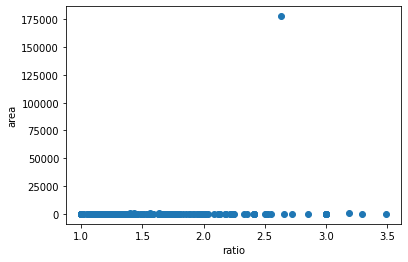

In [ ]:
# plt.scatter(ratios, areas)
# plt.xlabel('ratio')
# plt.ylabel('area')
# plt.show()

In [ ]:
# # dùng luật về tỉ lệ và diện tích: README

# img_arearatio = img.copy()
# cv2.drawContours(img_arearatio, [boxes[i] for i in range(len(boxes)) if ratios[i] < 2.5 or areas[i] < 20], -1, (0, 195, 255), 1, cv2.LINE_4)
# cv2.drawContours(img_arearatio, [boxes[i] for i in range(len(boxes)) if 2.5 <= ratios[i] and 20 <= areas[i]], -1, (51, 87, 255), 1, cv2.LINE_4)

# cv2.imwrite('1/img_arearatio.png', img_arearatio)

True

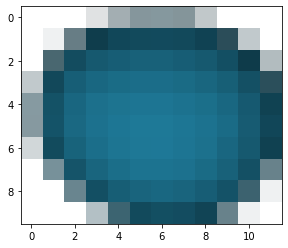

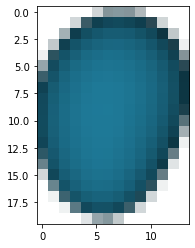

True

In [ ]:
# # dùng luật về moment (HuMoment, không phải nội dung như SIFT): README

# # giot tròn: 1, 11, 12, 13, 19, 27, 34, 39, 44, 46, 50, 52, 59, 84, 94, 98
# # giọt dài: 3, 10, 15, 18, 32,
# idx_1 = 1
# idx_2 = 3

# # hiển thị ảnh của template
# x1, y1, w, h = cv2.boundingRect(contours[idx_1])
# drop = get_drops(img, [[x1, y1, x1 + w, y1 + h]])[0]
# plt.imshow(cv2.cvtColor(drop, cv2.COLOR_BGR2RGB))
# plt.show()
# x1, y1, w, h = cv2.boundingRect(contours[idx_2])
# drop = get_drops(img, [[x1, y1, x1 + w, y1 + h]])[0]
# plt.imshow(cv2.cvtColor(drop, cv2.COLOR_BGR2RGB))
# plt.show()

# # tính độ khớp với mỗi template
# ret_1 = [cv2.matchShapes(contours[idx_1], cnt, 1, 0.0) for cnt in contours]
# ret_2 = [cv2.matchShapes(contours[idx_2], cnt, 1, 0.0) for cnt in contours]
# img_matchshape_1 = img.copy()
# maskout_1 = np.full_like(img, 255)

# YELLOW = (0, 195, 255)
# RED = (51, 87, 255)
# GREEN = (50, 205, 50)

# # mask_red = []
# for i in range(len(boxes)):
#     # vẽ contour màu vàng cho các drop, đồng thời tạo mask để tí lọc bỏ các drop này
#     # có thể đánh nhãn luôn ở bước này
#     if ret_1[i] < 0.16 or ret_2[i] < 0.16 or areas[i] < 10:
#         cv2.drawContours(img_matchshape_1, [contours[i]], -1, YELLOW, 1, cv2.LINE_4)
#         cv2.drawContours(maskout_1, [contours[i]], -1, 0, -1, cv2.LINE_4)
#     else:
#         # vẽ contour màu đỏ cho các trường hợp còn lại
#         cv2.drawContours(img_matchshape_1, [contours[i]], -1, RED, 1, cv2.LINE_4)

#         # # tạo riêng từng mask cho mỗi contour đó
#         # tmask = np.zeros_like(img)
#         # cv2.drawContours(tmask, [contours[i]], -1, (255, 255, 255), -1, cv2.LINE_4)
#         # mask_red.append(tmask)


# cv2.imwrite('1/img_matchshape_1.png', img_matchshape_1)
# cv2.imwrite('1/maskout_1.png', maskout_1)

In [ ]:
# visualize khoảng cách của 1 số giọt với template về shape
# sau khi chạy xong thì phải chạy lại các đoạn code bên trên do đã dùng chung tên biến

# rectangles = [cv2.boundingRect(cnt) for cnt in contours]
# for i in range(len(rectangles)):
#     x, y, w, h = rectangles[i]
#     x = x + int(w/2)
#     y = y + int(h/2)
#     rectangles[i] = (x, y, w, h)
# boxes = xywh_to_xyxy(rectangles)
# boxes = np.concatenate([np.array(boxes),
#                         np.expand_dims(np.array(ret_1), axis=-1), np.zeros((len(ret_1), 1))], axis=1)
# boxes = np.array([boxes[i] for i in range(len(boxes)) if areas[i] > 5])
# os.makedirs('1/rets', exist_ok=True)
# for _ in range(24):
#     indexes = np.random.choice(list(range(len(boxes))), 50)
#     sample_boxes = boxes[indexes]
#     temp_img = plot_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), boxes=sample_boxes, font_size=10)
#
#     cv2.imwrite(f'1/rets/{_}.png', cv2.cvtColor(temp_img, cv2.COLOR_RGB2BGR))

In [ ]:
# plt.figure(figsize=(20, 10))
# plt.hist(temp_ret_1, bins=len(temp_ret_1))
# plt.xlim([0, 2])
# plt.show()
# plt.figure(figsize=(20, 10))
# plt.hist(temp_ret_2, bins=len(temp_ret_1))
# plt.xlim([0, 2])
# plt.show()

In [ ]:
# # lọc bỏ các drop đã detect được
# # chắc là chỉ có ích cho việc visualize kết quả

# # sau bước lọc này sẽ để lại nhiễu
# img_maskout_1 = np.full_like(img, 255)
# img_maskout_1[maskout_1 == 255] = img[maskout_1 == 255]

# # tạo mask lọc nhiễu bằng cách blur ảnh nhị phân
# ret, thresh_maskout_1 = cv2.threshold(cv2.cvtColor(img_maskout_1, cv2.COLOR_BGR2GRAY), 254, 255, cv2.THRESH_BINARY_INV)
# thresh_maskout_1_blur = cv2.medianBlur(thresh_maskout_1, 5)
# img_maskout_1 = np.full_like(img, 255)
# img_maskout_1[thresh_maskout_1_blur == 255] = img[thresh_maskout_1_blur == 255]

# cv2.imwrite('1/img_maskout_1.png', img_maskout_1)
# cv2.imwrite('1/thresh_maskout_1.png', thresh_maskout_1)

# img_maskout_1_gray = cv2.cvtColor(img_maskout_1, cv2.COLOR_BGR2GRAY)
# cv2.imwrite('1/img_maskout_1_gray.png', img_maskout_1_gray)

True

# YOLOv5

In [5]:
!git clone https://github.com/LapTQ/deep_spray.git
%cd deep_spray
!pip install -r requirements.txt

Cloning into 'deep_spray'...
remote: Enumerating objects: 1924, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 1924 (delta 64), reused 298 (delta 57), pack-reused 1617
Receiving objects: 100% (1924/1924), 262.00 MiB | 30.83 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/deep_spray/deep_spray
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!python gen_data.py --train_num 1000 --valid_num 100

[INFO] Preparing for image generation...
[INFO] Generating for train: 0it [00:00, ?it/s]
[INFO] Generating for valid:  22% 22/100 [01:49<06:25,  4.95s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
[INFO] Generating for valid: 100% 100/100 [08:15<00:00,  4.96s/it]


In [ ]:
!zip -r dataset.zip dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

In [5]:
with open('data/deepspray.yaml', 'w') as f:
    f.write(f"""train: ./dataset/images/train/
val: ./dataset/images/val/

# number of classes
nc: 5

# class names
names: ['bag', 'lobe', 'Detached ligament', 'drop', 'Attached ligament']""")

Change augment to False

In [7]:
!unzip ../dataset.zip -d .

Archive:  ../dataset.zip
   creating: ./dataset/
   creating: ./dataset/labels/
   creating: ./dataset/labels/train/
  inflating: ./dataset/labels/train/000986.txt  
  inflating: ./dataset/labels/train/000739.txt  
  inflating: ./dataset/labels/train/000145.txt  
  inflating: ./dataset/labels/train/000633.txt  
  inflating: ./dataset/labels/train/000768.txt  
  inflating: ./dataset/labels/train/000355.txt  
  inflating: ./dataset/labels/train/000071.txt  
  inflating: ./dataset/labels/train/000189.txt  
  inflating: ./dataset/labels/train/000431.txt  
  inflating: ./dataset/labels/train/001241.txt  
  inflating: ./dataset/labels/train/000627.txt  
  inflating: ./dataset/labels/train/000442.txt  
  inflating: ./dataset/labels/train/000243.txt  
  inflating: ./dataset/labels/train/001229.txt  
  inflating: ./dataset/labels/train/000438.txt  
  inflating: ./dataset/labels/train/001016.txt  
  inflating: ./dataset/labels/train/000467.txt  
  inflating: ./dataset/labels/train/000256.txt  
 

In [ ]:
!python train.py --img 1200 --batch 2 --epochs 50 --data deepspray.yaml --weights yolov5x.pt --workers 4 --name deepspray --cache

train: weights=yolov5x.pt, cfg=, data=deepspray.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=2, imgsz=1200, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=runs/train, name=deepspray, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-317-g0ab303b Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv